
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [5]:
my_cols = pd.read_csv('./data/pokemon/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/pokemon/pokemon.csv',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [6]:
# Análisis exploratorio básico
print(my_data.info())
print(my_data.describe())

# Crear listas de tipos de columnas
num_cols = my_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = my_data.select_dtypes(include=['object']).columns

# Preprocesamiento
# Reemplazar los valores nulos en las columnas numéricas con la mediana y escalar
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Reemplazar los valores nulos en las columnas categóricas con la moda y one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Juntar los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

# Ajustar y transformar los datos
df_preprocessed = preprocessor.fit_transform(my_data)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 801 entries, ("['Overgrow', 'Chlorophyll']", 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 2.0, 1.0, 0.25, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0) to ("['Soul-Heart']", 0.25, 0.5, 0.0, 1.0, 0.5, 1.0, 2.0, 0.5, 1.0, 0.5, 2.0, 0.5, 0.5, 0.0, 0.5, 0.5, 1.0)
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    float64
 1   japanese_name      801 non-null    int64  
 2   pokedex_number     801 non-null    int64  
 3   percentage_male    801 non-null    int64  
 4   type1              801 non-null    int64  
 5   type2              801 non-null    object 
 6   classification     801 non-null    object 
 7   height_m           801 non-null    int64  
 8   weight_kg          801 non-null    int64  
 9   capture_rate       781 non-null    float64
 10  baseeggsteps       801 non-null    int64  
 11  abilities          801 non-null    object 
 12  e

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0]


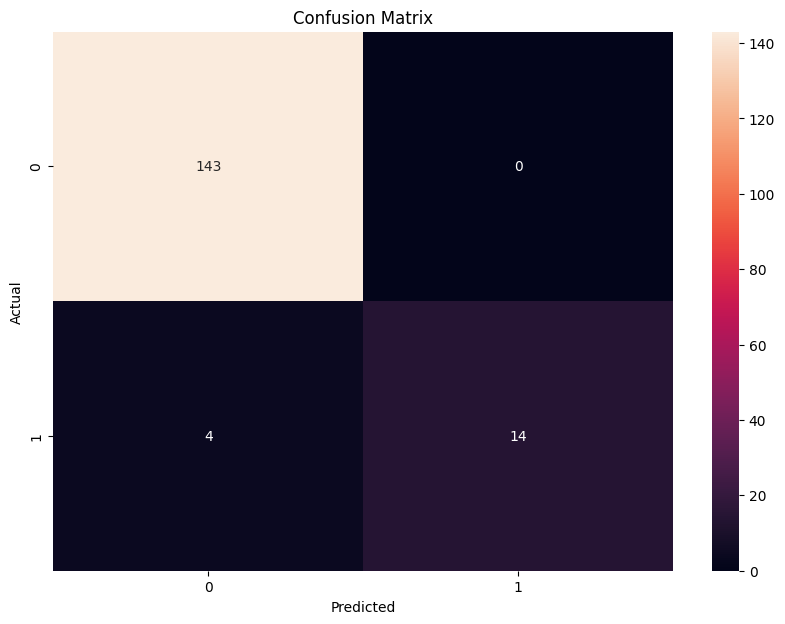

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_preprocessed
y = my_data['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_dense = X_train.toarray()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_dense)

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_pca, y_train)

# Transformar los datos de prueba
X_test_dense = X_test.toarray()
X_test_pca = pca.transform(X_test_dense)

# Predecir
y_pred = model.predict(X_test_pca)
print(y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Evaluar el modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.9751552795031055
Recall: 0.7777777777777778
Precision: 1.0
F1 Score: 0.8750000000000001


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

Evaluación del modelo LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       143
           1       1.00      0.72      0.84        18

    accuracy                           0.97       161
   macro avg       0.98      0.86      0.91       161
weighted avg       0.97      0.97      0.97       161

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0]


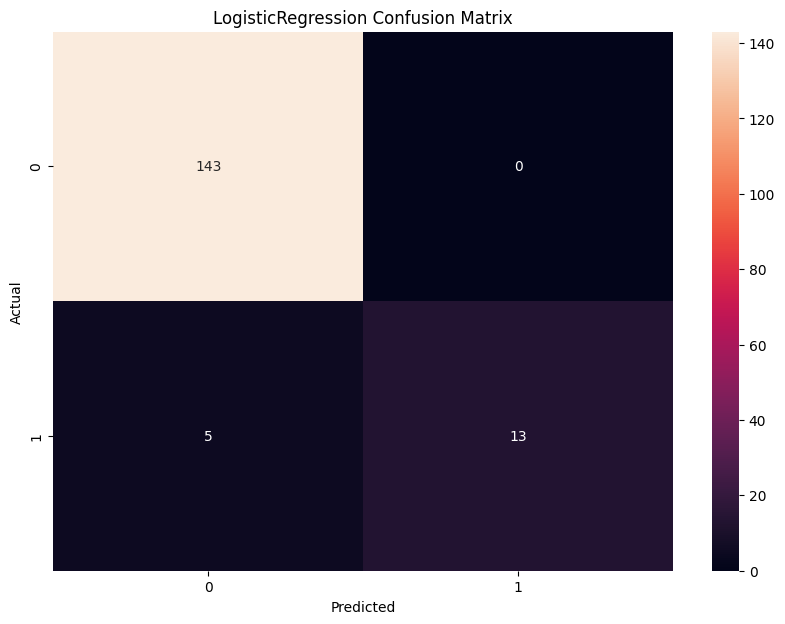

Evaluación del modelo LogisticRegressionCV:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       143
           1       1.00      0.72      0.84        18

    accuracy                           0.97       161
   macro avg       0.98      0.86      0.91       161
weighted avg       0.97      0.97      0.97       161

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0]


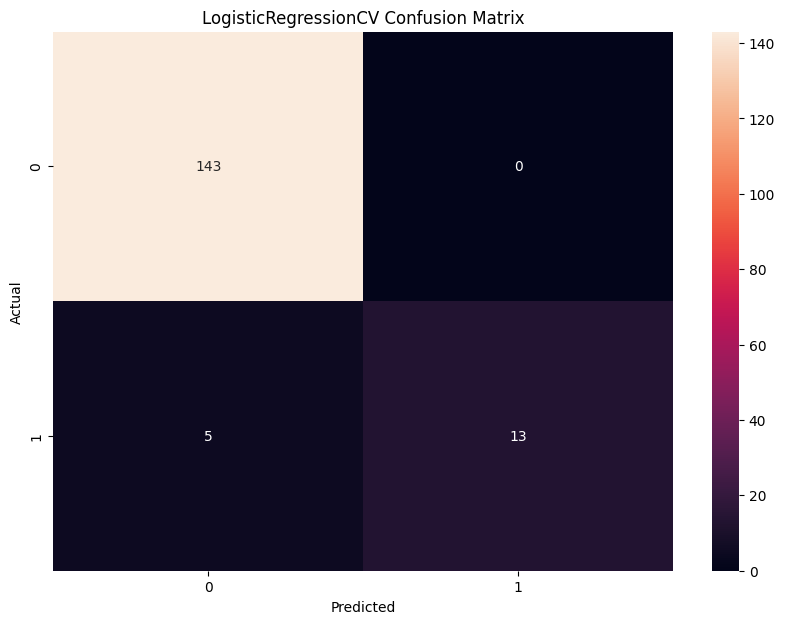

Evaluación del modelo SGDClassifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       143
           1       1.00      0.67      0.80        18

    accuracy                           0.96       161
   macro avg       0.98      0.83      0.89       161
weighted avg       0.96      0.96      0.96       161

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0]


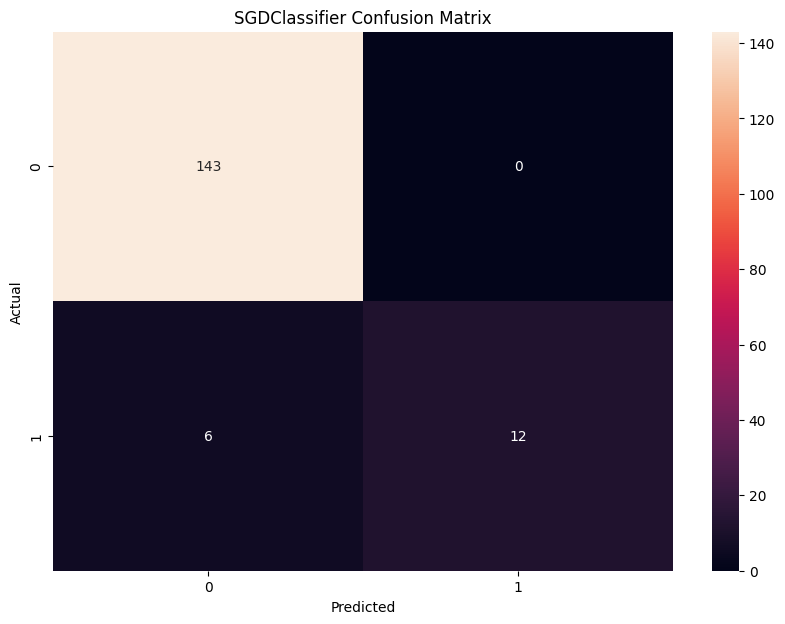

In [9]:
def prepare_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_dense)
    X_test_pca = pca.transform(X_test_dense)
    return X_train_pca, X_test_pca, y_train, y_test

# Entrenamiento del modelo
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

# Evaluación del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def plot_model(model,X_test_pca,y_test,y_pred):
    y_pred = model.predict(X_test_pca)
    print(y_pred)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Preparación de los datos
X_train_pca, X_test_pca, y_train, y_test = prepare_data(X, y)

# Modelos de clasificación
classification_models = [
    LogisticRegression(random_state=42),
    LogisticRegressionCV(cv=5, random_state=42),
    SGDClassifier(random_state=42),
]

for model in classification_models:
    model = train_model(model, X_train_pca, y_train)
    print(f"Evaluación del modelo {model.__class__.__name__}:")
    evaluate_model(model, X_test_pca, y_test)
    plot_model(model,X_test_pca,y_test,y_pred)


Tenemos comportamientos similares con los 3 modelos propuestos de clasificacion, solo el ultimo que seria el SGDClassifier tiene un valor a mas de False Negative que los modelos anteriores segun las matrices de confucion.